# Visualization of different altitude sensor measurements 
I need understand what each value is

## Plotting altitude values 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

%matplotlib inline

In [2]:
cwd = os.getcwd()

#example parquet fdir for plotting
fdir = 'Tail_687_1_parquet'

#example parquet file
file = '687200104111158.parquet'
#file = '687200104202027.parquet'
#file = '687200107122323.parquet'
#file = '687200104162039.parquet'
#file = '687200104181334.parquet' #bad file?
#file = '687200108171530.parquet'
#file = '687200107121151.parquet'
#file = '687200109061936.parquet'
#file = '687200109110853.parquet'

#files used in the NN
#file = "687200107192334.parquet" #late start on the recording
#file = "687200107301239.parquet"
#file = "687200104261527.parquet"
#file = "687200107251002.parquet"
#file = "687200104301119.parquet"
#file = "687200107101600.parquet" #max alt 5380 instead of the regular alt 5500
#file = "687200104170717.parquet"
#file = "687200107181544.parquet"
#file = "687200104202027.parquet"
#file = "687200107170234.parquet"
#file = "687200107251652.parquet"
#file = "687200107122323.parquet" #late start to recording
#file = "687200104162039.parquet"
#file = "687200107311025.parquet"
#file = "687200104181334.parquet"
#file = "687200107171131.parquet"
#file = "687200104181127.parquet"
#file = "687200107241524.parquet"
#file = "687200107060930.parquet"
#file = "687200107150546.parquet"

pname = os.path.join(cwd,fdir,file)

df = pd.read_parquet(path=pname)
#df['ALT']
df

,time,GMTsecs,VAR_1107,VAR_2670,VAR_5107,VAR_6670,FPAC,BLAC,CTAC,TH,...,ATEN,LATP,FIRE_1,FIRE_2,FIRE_3,FIRE_4,FGC3,ILSF,ESN_1,ESN_2
0,43056.000455,43056.0,NaN,NaN,NaN,NaN,0.0,-0.000977,0.000000,-148.140717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43056.063012,NaN,NaN,NaN,NaN,NaN,0.0,0.002931,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43056.125569,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43056.188126,NaN,NaN,NaN,NaN,NaN,0.0,0.003908,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43056.250683,NaN,NaN,NaN,NaN,NaN,0.0,0.007816,0.000000,-148.118744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125298,50894.257628,NaN,NaN,NaN,NaN,NaN,0.0,-0.007816,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125299,50894.320184,NaN,NaN,NaN,NaN,NaN,0.0,-0.006839,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125300,50894.382741,NaN,NaN,NaN,NaN,NaN,0.0,-0.007816,0.000000,134.529068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125301,50894.445298,NaN,NaN,NaN,NaN,NaN,0.0,-0.005862,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#output value to model with NN
Tlist = ['ALT']

#list of what I think are the dependent variables to create a model for T.
Xlist = ['time', 
         'RALT', 
         'ALTR', 'IVV', 'VSPS', 
         'VRTG', 'LATG', 'LONG', 'FPAC', 'BLAC', 'CTAC', 
         'PSA', 'PI', 'PT', 
         'TAS', 'CAS', 'GS', 'CASS', 'WS', 
         'PTCH', 'ROLL', 'DA', 
         'TAT', 'SAT', 
         'LATP', 'LONP']

##new list of what I think are the dependent variables to create a model for T.
#Xlist = ['time', 
#         'RALT', 
#         'PSA', 'PI', 'PT', 
#         'ALTR', 'IVV', 
#         'VRTG', 'LATG', 'FPAC', 'BLAC', 'CTAC', 
#         'TAS', 'CAS', 'GS', 'CASS', 'WS', 'PTCH', 'ROLL', 'DA', 'TAT', 
#         'SAT', 'LATP', 'LONP']

#may want to try this with Selected Alt (ALTS) in the Xlist

In [4]:
#altitude sensor measurements
#pressure altitude
alt  = df['ALT']
#selected altitude
alts = df['ALTS']
#radio altitude
ralt = df['RALT']
#barometric corrected altitude
baro1= df['BAL1']
#barometric corrected altitude
baro2= df['BAL2']

#----
#average static pressure
psa= df['PSA']
#Impact pressure (dynamic pressure?)
pi = df['PI']
#total pressure
pt = df['PT']

#static pressure (inches of mercury converted to mB)
ps = df['PS'] * 33.86


#---
#altitude rate
altr = df['ALTR']
#Inertial verticle speed
ivv = df['IVV']
#Selected verticle speed
vsps = df['VSPS']

#---
#verticle acceleration
vertg = df['VRTG']
latg  = df['LATG']
long  = df['LONG']
fpac  = df['FPAC']
blac  = df['BLAC']
ctac  = df['CTAC']


#calt = df['CALT']

time = df['time']

In [5]:
np.min(ralt), np.max(ralt)

(-3.5, 5500.0)

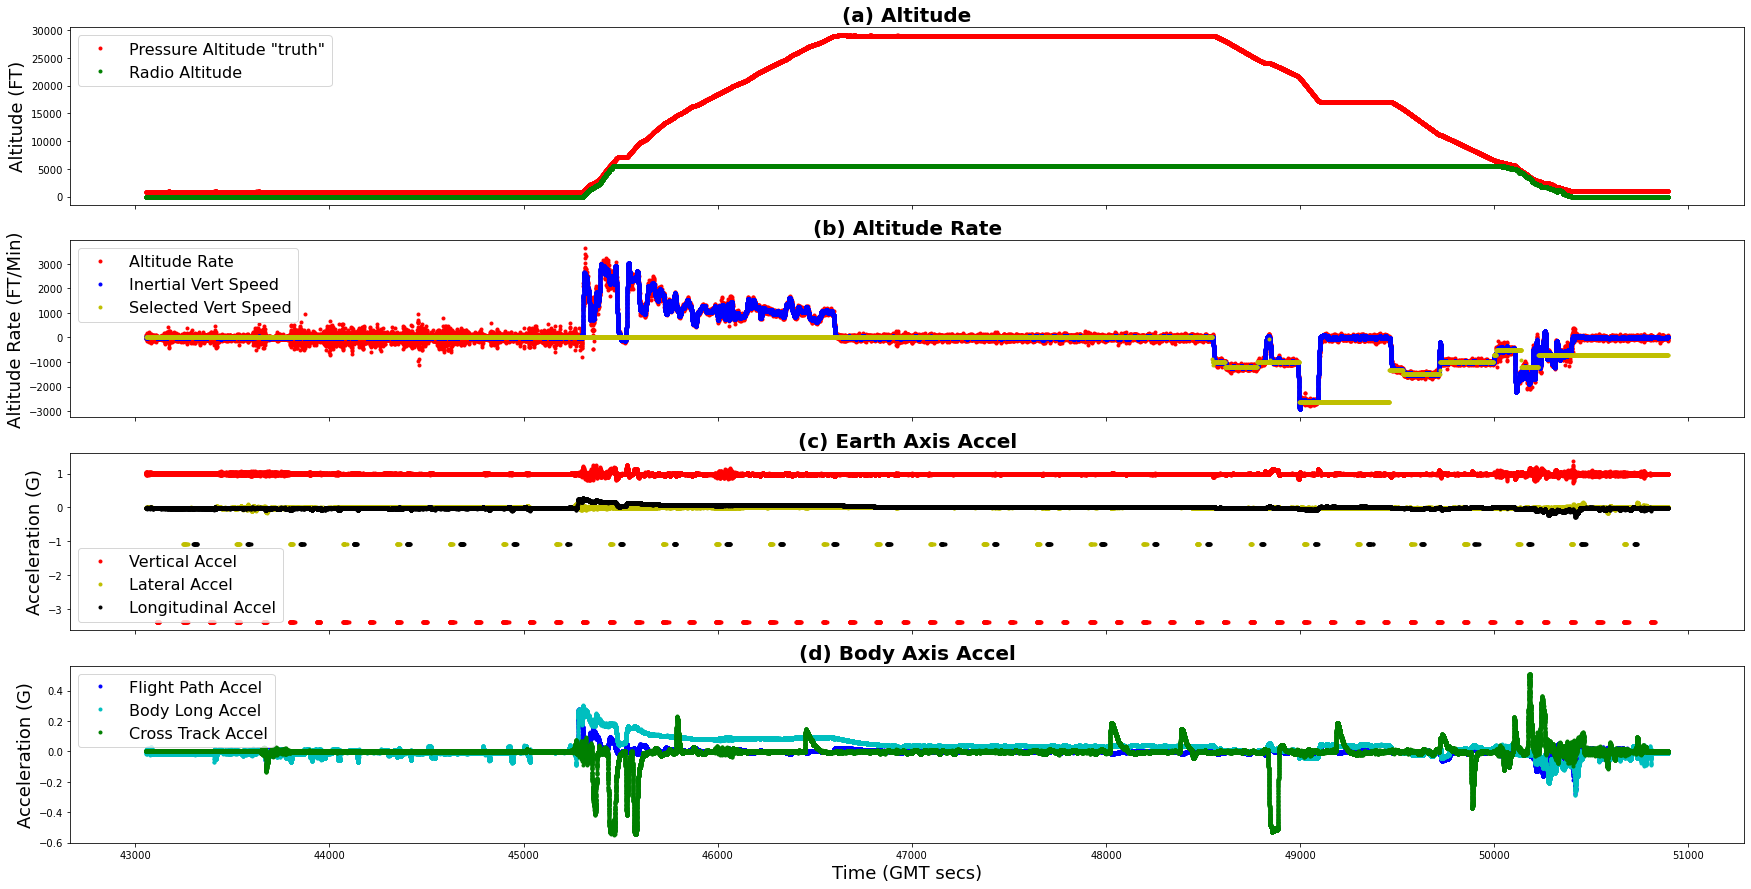

In [8]:

plots4paper = True
singlecolumn = True

if plots4paper:
    #----------------smaller plots for the paper-----------

    #if the paper i'm making it for is single column make the plot wider
    if singlecolumn:
        fig = plt.figure(figsize=(30, 15))
    else:
        fig = plt.figure(figsize=(15, 15))
        
    #fig.suptitle('Flight Values Comparison Plot',fontsize=20)

    legendfont = 16


    #number of vertical subplots
    nv = 4

    #------
    #subplot 1
    ax1 = plt.subplot(nv,1,1)
    plt.plot(time, alt,  'r.', label='Pressure Altitude "truth"')
    #plt.plot(time, baro1,'b.', label='Baro Correct Altitude (BAL1) 4Hz')
    plt.plot(time, ralt, 'g.', label='Radio Altitude ')
    #plt.plot(time, baro2,'g-', label='Baro Correct Altitude (BAL2)')
    #plt.plot(time, alts, 'y.', label='Selected Alt (ALTS)')
    ax1.set_title('(a) Altitude', fontsize=20, fontweight="bold")
    plt.ylabel('Altitude (FT)',fontsize=18)
    plt.tick_params(axis='x', labelbottom=False) # labels along the bottom edge are off
    plt.legend(fontsize=legendfont,loc='upper left');

    #------
    #subplot 2
    ax2 = plt.subplot(nv,1,2)
    plt.plot(time, altr,'r.', label='Altitude Rate')
    plt.plot(time, ivv, 'b.', label='Inertial Vert Speed')
    plt.plot(time, vsps,'y.', label='Selected Vert Speed')
    ax2.set_title('(b) Altitude Rate', fontsize=20, fontweight="bold")
    plt.ylabel('Altitude Rate (FT/Min)',fontsize=18)
    plt.tick_params(axis='x', labelbottom=False) # labels along the bottom edge are off
    plt.legend(fontsize=legendfont,loc='upper left');

    #------
    #subplot 3
    ax3 = plt.subplot(nv,1,3)
    plt.plot(time, vertg,'r.', label='Vertical Accel')
    plt.plot(time, latg, 'y.', label='Lateral Accel')
    plt.plot(time, long, 'k.', label='Longitudinal Accel')
    #plt.plot(time, fpac, 'b.', label='Flight Path Acceleration (FPAC)')
    #plt.plot(time, blac, 'c.', label='Body Long Acceleration (BLAC)')
    #plt.plot(time, ctac, 'g.', label='Cross Track Acceleration (CTAC)')
    ax3.set_title('(c) Earth Axis Accel', fontsize=20, fontweight="bold")
    plt.ylabel('Acceleration (G)',fontsize=18)
    plt.tick_params(axis='x', labelbottom=False) # labels along the bottom edge are off
    plt.legend(fontsize=legendfont,loc='lower left');

    #------
    #subplot 4
    ax4 = plt.subplot(nv,1,4)
    plt.plot(time, fpac, 'b.', label='Flight Path Accel')
    plt.plot(time, blac, 'c.', label='Body Long Accel')
    plt.plot(time, ctac, 'g.', label='Cross Track Accel')
    ax4.set_title('(d) Body Axis Accel', fontsize=20, fontweight="bold")
    plt.ylabel('Acceleration (G)',fontsize=18)
    plt.legend(fontsize=legendfont,loc='upper left');
    plt.xlabel('Time (GMT secs)',fontsize=18);

else:
    #----------------nice plots-----------
    fig = plt.figure(figsize=(30, 15))
    #fig.suptitle('Flight Values Comparison Plot',fontsize=20)

    legendfont = 16


    #number of vertical subplots
    nv = 4

    #------
    #subplot 1
    ax1 = plt.subplot(nv,1,1)
    plt.plot(time, alt,  'ro', label='Pressure Altitude "truth" (ALT) 4Hz')
    #plt.plot(time, baro1,'b.', label='Baro Correct Altitude (BAL1) 4Hz')
    plt.plot(time, ralt, 'g.', label='Radio Altitude (RALT) 8Hz')
    #plt.plot(time, baro2,'g-', label='Baro Correct Altitude (BAL2)')
    #plt.plot(time, alts, 'y.', label='Selected Alt (ALTS)')
    ax1.set_title('(a) Altitude', fontsize=20, fontweight="bold")
    plt.ylabel('Altitude (FT)',fontsize=18)
    plt.tick_params(axis='x', labelbottom=False) # labels along the bottom edge are off
    plt.legend(fontsize=legendfont,loc='upper left');

    #------
    #subplot 2
    ax2 = plt.subplot(nv,1,2)
    plt.plot(time, altr,'r.', label='Altitude Rate (ALTR) 4Hz')
    plt.plot(time, ivv, 'b.', label='Inertial Vert Speed (IVV) 16Hz')
    plt.plot(time, vsps,'y.', label='Selected Vert Speed (VSPS) 1Hz')
    ax2.set_title('(b) Altitude Rate', fontsize=20, fontweight="bold")
    plt.ylabel('Altitude Rate (FT/Min)',fontsize=18)
    plt.tick_params(axis='x', labelbottom=False) # labels along the bottom edge are off
    plt.legend(fontsize=legendfont,loc='upper left');

    #------
    #subplot 3
    ax3 = plt.subplot(nv,1,3)
    plt.plot(time, vertg,'r.', label='Vertical Acceleration (VRTG) 8Hz')
    plt.plot(time, latg, 'yo', label='Lateral Acceleration (LATG) 4Hz')
    plt.plot(time, long, 'ko', label='Longitudinal Acceleration (LONG) 4Hz')
    #plt.plot(time, fpac, 'b.', label='Flight Path Acceleration (FPAC)')
    #plt.plot(time, blac, 'c.', label='Body Long Acceleration (BLAC)')
    #plt.plot(time, ctac, 'g.', label='Cross Track Acceleration (CTAC)')
    ax3.set_title('(c) Earth Axis Acceleration', fontsize=20, fontweight="bold")
    plt.ylabel('Acceleration (G)',fontsize=18)
    plt.tick_params(axis='x', labelbottom=False) # labels along the bottom edge are off
    plt.legend(fontsize=legendfont,loc='lower left');

    #------
    #subplot 4
    ax4 = plt.subplot(nv,1,4)
    plt.plot(time, fpac, 'b.', label='Flight Path Acceleration (FPAC) 16Hz')
    plt.plot(time, blac, 'c.', label='Body Long Acceleration (BLAC) 16Hz')
    plt.plot(time, ctac, 'g.', label='Cross Track Acceleration (CTAC) 16Hz')
    ax4.set_title('(d) Body Axis Acceleration', fontsize=20, fontweight="bold")
    plt.ylabel('Acceleration (G)',fontsize=18)
    plt.legend(fontsize=legendfont,loc='upper left');
    plt.xlabel('Time (GMT secs)',fontsize=18);

    
#plt.savefig("sensorfig1.pdf", bbox_inches='tight')
#fig.set_size_inches(5,2.5)
#plt.savefig("figures/sensorfig1.pdf", bbox_inches='tight', dpi='figure')

plt.savefig("figures/sensorfig_30x15.png", bbox_inches='tight', dpi='figure')

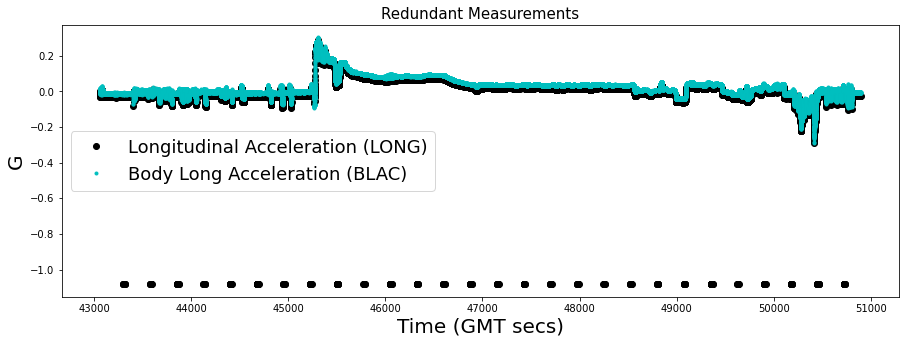

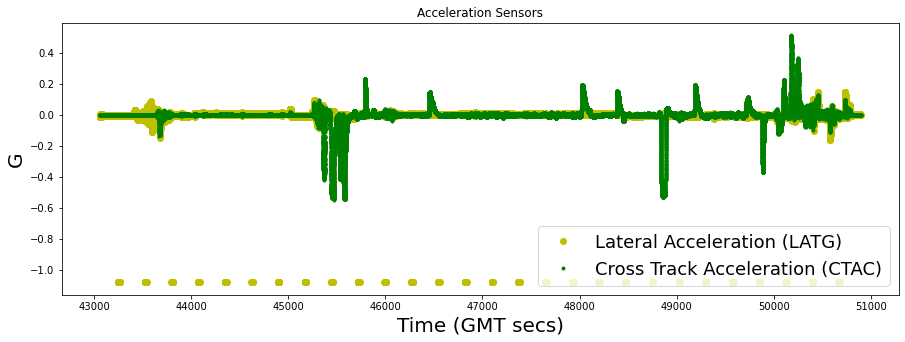

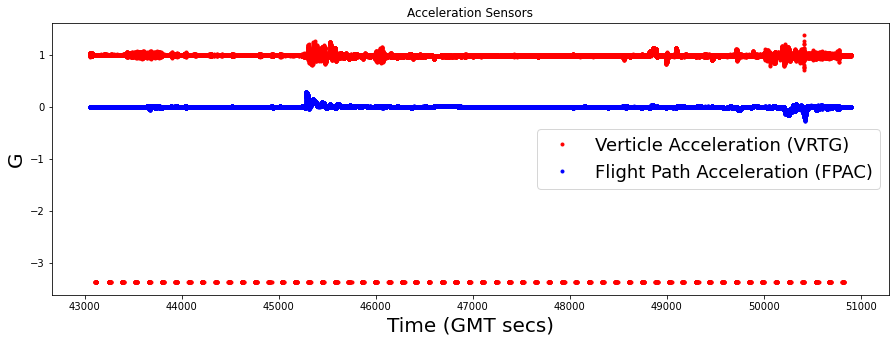

In [9]:
#------
#plot 3
fig = plt.figure(figsize=(15, 5))
plt.plot(time, long, 'ko', label='Longitudinal Acceleration (LONG)')
plt.plot(time, blac, 'c.', label='Body Long Acceleration (BLAC)')
ax = plt.gca()
ax.set_title('Redundant Measurements',fontsize=15)
plt.ylabel('G',fontsize=20)
plt.xlabel('Time (GMT secs)',fontsize=20)
plt.legend(fontsize=18);

#------
#plot 3
fig = plt.figure(figsize=(15, 5))
plt.plot(time, latg, 'yo', label='Lateral Acceleration (LATG)')
plt.plot(time, ctac, 'g.', label='Cross Track Acceleration (CTAC)')
ax = plt.gca()
ax.set_title('Acceleration Sensors')
plt.ylabel('G',fontsize=20)
plt.xlabel('Time (GMT secs)',fontsize=20)
plt.legend(fontsize=18);

#------
#plot 3
fig = plt.figure(figsize=(15, 5))
plt.plot(time, vertg,'r.', label='Verticle Acceleration (VRTG)')
plt.plot(time, fpac, 'b.', label='Flight Path Acceleration (FPAC)')
ax = plt.gca()
ax.set_title('Acceleration Sensors')
plt.ylabel('G',fontsize=20)
plt.xlabel('Time (GMT secs)',fontsize=20)
plt.legend(fontsize=18);

### Looking at the outlier values in the 3 directional accelerations

In [10]:
temp = df[['time','VRTG','LATG','LONG']]
i = np.argmin(temp['VRTG'])
j = np.argmin(temp['LATG'])
k = np.argmin(temp['LONG'])


print(temp.iloc[i-5:i+5])
print('\n',temp.iloc[j-5:j+5])
print('\n',temp.iloc[k-5:k+5])


             time      VRTG      LATG      LONG
849  43109.111282       NaN       NaN       NaN
850  43109.173839  1.001568       NaN       NaN
851  43109.236396       NaN       NaN       NaN
852  43109.298953  0.999279 -0.007356 -0.029708
853  43109.361510       NaN       NaN       NaN
854  43109.424066 -3.375000       NaN       NaN
855  43109.486623       NaN       NaN       NaN
856  43109.549180  0.999279 -0.008372 -0.027676
857  43109.611737       NaN       NaN       NaN
858  43109.674294  1.001568       NaN       NaN

               time      VRTG      LATG      LONG
3051  43246.861623       NaN       NaN       NaN
3052  43246.924180  1.003857 -0.007864 -0.028692
3053  43246.986737       NaN       NaN       NaN
3054  43247.049294  1.001568       NaN       NaN
3055  43247.111851       NaN       NaN       NaN
3056  43247.174408  0.999279 -1.083300 -0.027168
3057  43247.236965       NaN       NaN       NaN
3058  43247.299522  1.001568       NaN       NaN
3059  43247.362079       NaN 

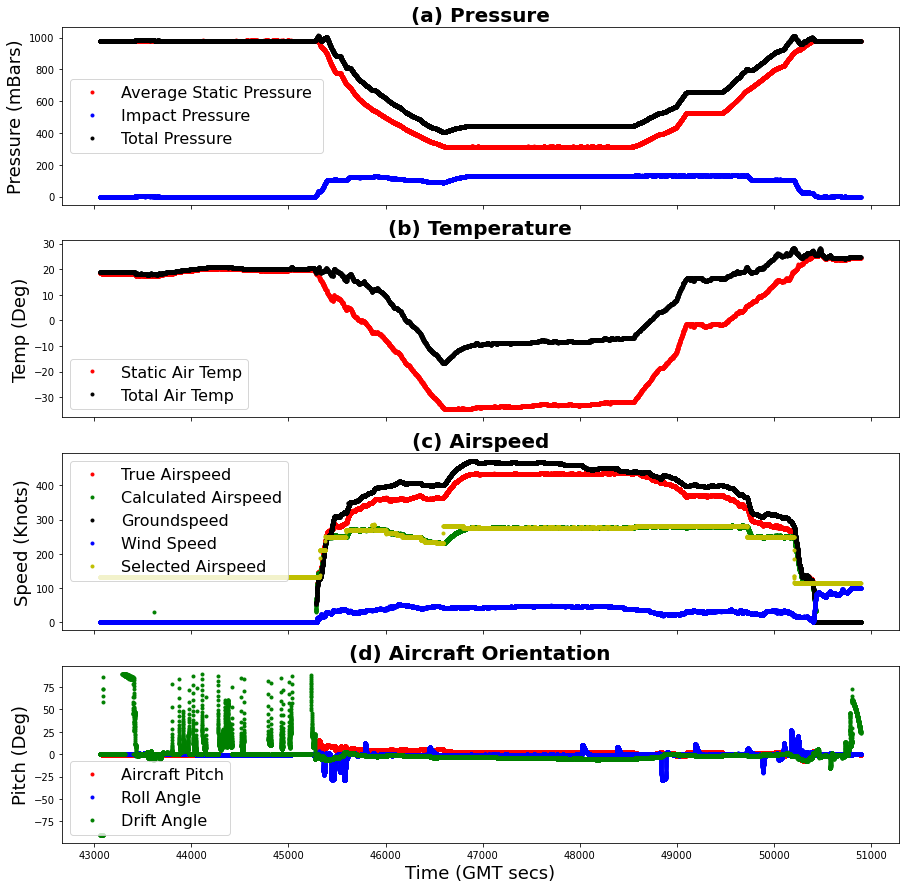

In [29]:

#---
#true airspeed
tas = df['TAS']
#computed airspeed
cas = df['CAS']
#ground speed
gs = df['GS']
#selected airspeed
cass = df['CASS']
#wind speed
ws = df['WS']

#---
pitch = df['PTCH']
roll = df['ROLL']
da = df['DA'] #drift angle (maybe this is yaw?)


#---
#total air temp
tat = df['TAT']
#static air temp
sat = df['SAT']


plots4paper = True

if plots4paper:
    #----------------smaller plots for the paper-----------

    fig = plt.figure(figsize=(15, 15))
    #fig.suptitle('Flight Values Comparison Plot',fontsize=20)
    #number of vertical subplots
    nv = 4

    #------
    #subplot 1
    ax1 = plt.subplot(nv,1,1)
    plt.plot(time, psa, 'r.', label='Average Static Pressure ')
    plt.plot(time, pi,  'b.', label='Impact Pressure')
    plt.plot(time, pt,  'k.', label='Total Pressure')
    #plt.plot(time, ps,  'c.', label='Static Pressure (PS)') #same as average static pressure
    ax1.set_title('(a) Pressure', fontsize=20, fontweight="bold")
    plt.ylabel('Pressure (mBars)',fontsize=18)
    plt.tick_params(axis='x', labelbottom=False) # labels along the bottom edge are off
    plt.legend(fontsize=legendfont);

    #------
    #subplot 2
    ax3 = plt.subplot(nv,1,2)
    plt.plot(time, sat,'r.', label='Static Air Temp')
    plt.plot(time, tat,'k.', label='Total Air Temp')
    plt.ylabel('Temp (Deg)',fontsize=18)
    ax3.set_title('(b) Temperature', fontsize=20, fontweight="bold")
    plt.tick_params(axis='x', labelbottom=False) # labels along the bottom edge are off
    plt.legend(fontsize=legendfont);

    #------
    #subplot 3
    ax2 = plt.subplot(nv,1,3)
    plt.plot(time, tas,  'r.', label='True Airspeed')
    plt.plot(time, cas,  'g.', label='Calculated Airspeed')
    plt.plot(time, gs,   'k.', label='Groundspeed')
    plt.plot(time, ws,   'b.', label='Wind Speed')
    plt.plot(time, cass, 'y.', label='Selected Airspeed')
    ax2.set_title('(c) Airspeed', fontsize=20, fontweight="bold")
    plt.ylabel('Speed (Knots)',fontsize=18)
    plt.tick_params(axis='x', labelbottom=False) # labels along the bottom edge are off
    plt.legend(fontsize=legendfont);

    #------
    #subplot 4
    ax3 = plt.subplot(nv,1,4)
    plt.plot(time, pitch,'r.', label='Aircraft Pitch')
    plt.plot(time, roll, 'b.', label='Roll Angle')
    plt.plot(time, da,   'g.', label='Drift Angle')
    plt.ylabel('Pitch (Deg)',fontsize=18)
    ax3.set_title('(d) Aircraft Orientation', fontsize=20, fontweight="bold")
    plt.legend(fontsize=legendfont,loc='lower left');
    plt.xlabel('Time (GMT secs)',fontsize=18);

else: 
    #----------------nice plots-----------


    fig = plt.figure(figsize=(30, 15))
    #fig.suptitle('Flight Values Comparison Plot',fontsize=20)
    #number of vertical subplots
    nv = 4

    #------
    #subplot 1
    ax1 = plt.subplot(nv,1,1)
    plt.plot(time, psa, 'ro', label='Average Static Pressure (PSA) 2Hz')
    plt.plot(time, pi,  'b.', label='Impact Pressure (PI) 2Hz')
    plt.plot(time, pt,  'k.', label='Total Pressure (PT) 2Hz')
    #plt.plot(time, ps,  'c.', label='Static Pressure (PS)') #same as average static pressure
    ax1.set_title('(a) Pressure', fontsize=20, fontweight="bold")
    plt.ylabel('Pressure (mBars)',fontsize=18)
    plt.tick_params(axis='x', labelbottom=False) # labels along the bottom edge are off
    plt.legend(fontsize=legendfont);

    #------
    #subplot 2
    ax3 = plt.subplot(nv,1,2)
    plt.plot(time, sat,'ro', label='Static Air Temp (SAT) 1Hz')
    plt.plot(time, tat,'k.', label='Total Air Temp (TAT) 1Hz')
    plt.ylabel('Temp (Deg)',fontsize=18)
    ax3.set_title('(b) Temperature', fontsize=20, fontweight="bold")
    plt.tick_params(axis='x', labelbottom=False) # labels along the bottom edge are off
    plt.legend(fontsize=legendfont);

    #------
    #subplot 3
    ax2 = plt.subplot(nv,1,3)
    plt.plot(time, tas,  'r+', label='True Airspeed (TAS) 4Hz')
    plt.plot(time, cas,  'g*', label='Calculated Airspeed (CAS) 4Hz')
    plt.plot(time, gs,   'k.', label='Groundspeed (GS) 4Hz')
    plt.plot(time, ws,   'b.', label='Wind Speed (WS) 4Hz')
    plt.plot(time, cass, 'y.', label='Selected Airspeed (CASS) 1Hz')
    ax2.set_title('(c) Airspeed', fontsize=20, fontweight="bold")
    plt.ylabel('Speed (Knots)',fontsize=18)
    plt.tick_params(axis='x', labelbottom=False) # labels along the bottom edge are off
    plt.legend(fontsize=legendfont);

    #------
    #subplot 4
    ax3 = plt.subplot(nv,1,4)
    plt.plot(time, pitch,'r+', label='Aircraft Pitch (PTCH) 8Hz')
    plt.plot(time, roll, 'b.', label='Roll Angle (ROLL) 8Hz')
    plt.plot(time, da,   'g.', label='Drift Angle (DA) 4Hz')
    plt.ylabel('Pitch (Deg)',fontsize=18)
    ax3.set_title('(d) Aircraft Orientation', fontsize=20, fontweight="bold")
    plt.legend(fontsize=legendfont,loc='lower left');
    plt.xlabel('Time (GMT secs)',fontsize=18);




#plt.savefig("figures/sensorfig2.pdf", bbox_inches='tight', dpi='figure')
plt.savefig("figures/sensorfig2.png", bbox_inches='tight', dpi='figure')
#subplot 5

In [12]:
#latitude position
lat = df['LATP']
#longitudinal position
lon = df['LONP']

#bounding box
box = ((lon.min(), lon.max(),
        lat.min(), lat.max()))
box = ((-93.483, -83.983, 38.836, 45.236)) #actual bounding box of map image
box

(-93.483, -83.983, 38.836, 45.236)

Go to [openstreetmap.org](https://www.openstreetmap.org/export#map=5/51.500/-0.100) and enter the bounding box coordinates, then take a screen capture
of the exact square that is outlined.

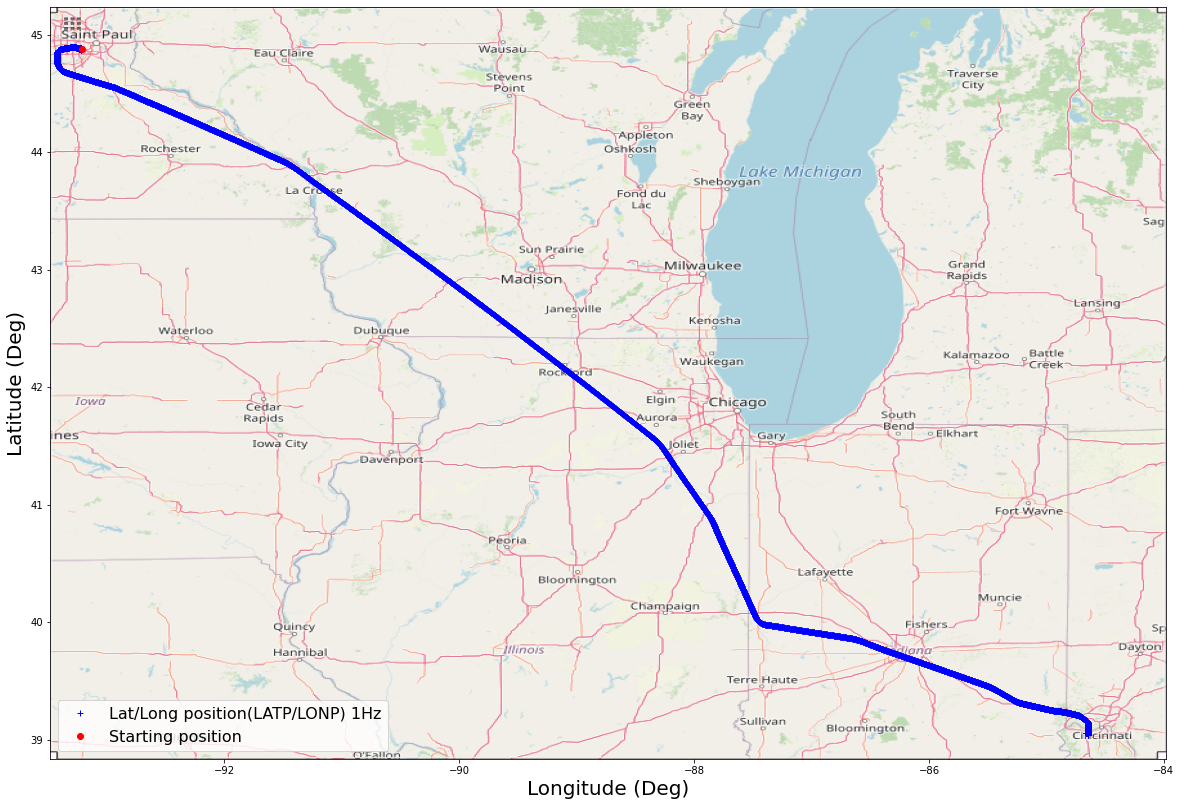

In [15]:
mapimg = plt.imread('map.png')

fig1 = plt.figure(figsize=(20, 15))
#fig1.suptitle('Aircraft Position',fontsize=20)

plt.plot(lon, lat,  'b+', label='Lat/Long position(LATP/LONP) 1Hz')
plt.plot(lon[1000], lat[1000],  'ro', label='Starting position')
ax = plt.gca()
#ax.set_title('Aircraft Lat/Long History',fontsize=15)

ax.imshow(mapimg, zorder=0, extent=box, aspect='equal')

plt.xlabel('Longitude (Deg)',fontsize=20)
plt.ylabel('Latitude (Deg)',fontsize=20)
plt.legend(fontsize=legendfont,loc='lower left');
plt.savefig("figures/sensorfig3.pdf", bbox_inches='tight', dpi='figure')
plt.savefig("figures/sensorfig3.png", bbox_inches='tight', dpi='figure')
#minneapolis to cincinnati?

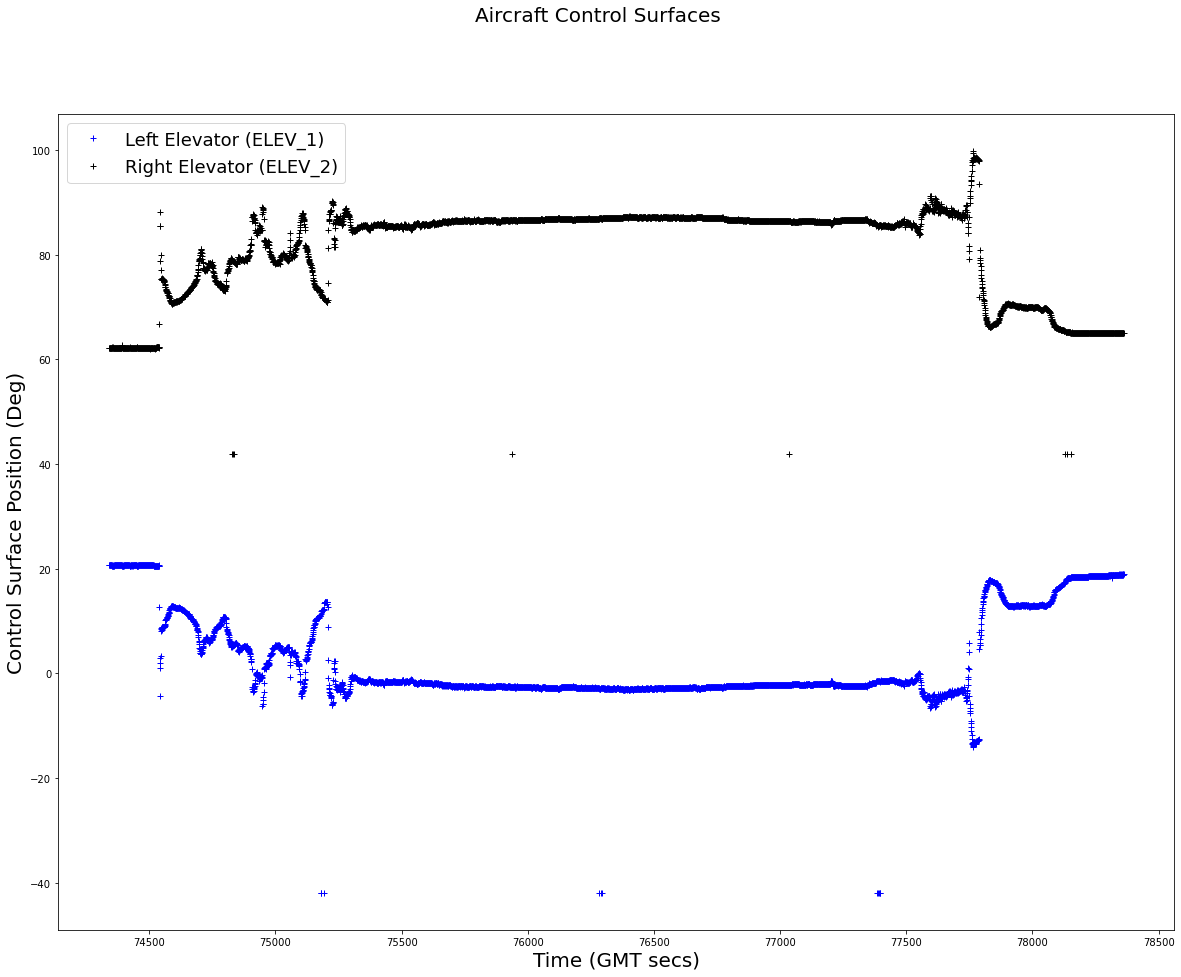

In [145]:
#elevator positions
elevl = df['ELEV_1']
elevr = df['ELEV_2']

fig2 = plt.figure(figsize=(20, 15))
fig2.suptitle('Aircraft Control Surfaces',fontsize=20)

plt.plot(time, elevl,  'b+', label='Left Elevator (ELEV_1)')
plt.plot(time, elevr,  'k+', label='Right Elevator (ELEV_2)')

plt.ylabel('Control Surface Position (Deg)',fontsize=20)
plt.xlabel('Time (GMT secs)',fontsize=20)
plt.legend(fontsize=18);


##getting rid of inner labels
#for ax in fig.get_axes():
#    ax.label_outer()

(0.0, 200.0)

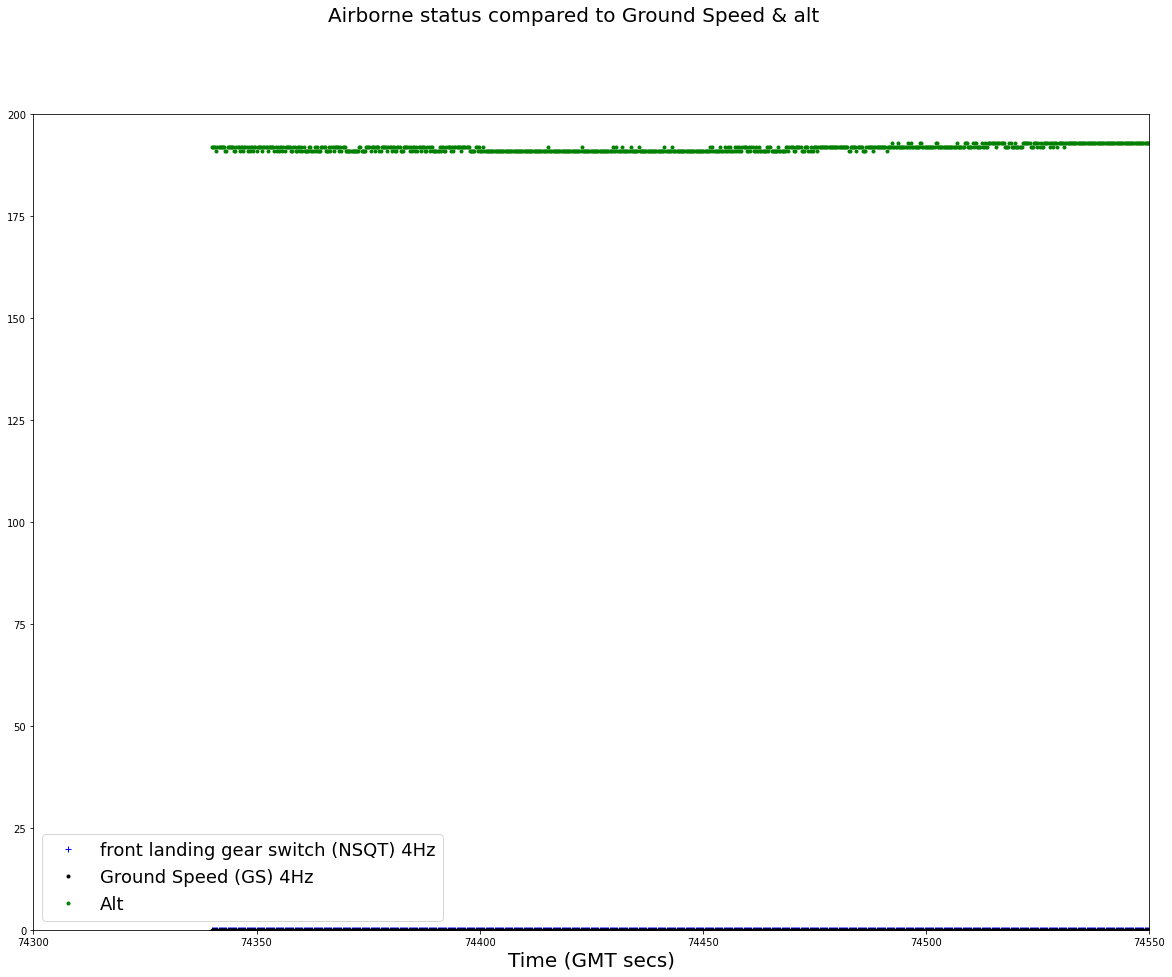

In [146]:
#elevator positions
nsqt = df['NSQT']
#elevr = df['ELEV_2']

fig2 = plt.figure(figsize=(20, 15))
fig2.suptitle('Airborne status compared to Ground Speed & alt',fontsize=20)


#plt.plot(time, vertg,'r.', label='Verticle Acceleration (VRTG) 8Hz')
plt.plot(time, nsqt,  'b+', label='front landing gear switch (NSQT) 4Hz')
plt.plot(time, gs,  'k.', label='Ground Speed (GS) 4Hz')
plt.plot(time, alt,  'g.', label='Alt')
#plt.plot(time, elevr,  'k+', label='Right Elevator (ELEV_2)')

plt.xlabel('Time (GMT secs)',fontsize=20)
plt.legend(fontsize=18);
plt.xlim(74300,74550)
plt.ylim(0,200)

##getting rid of inner labels
#for ax in fig.get_axes():
#    ax.label_outer()

<Figure size 1440x1080 with 0 Axes>

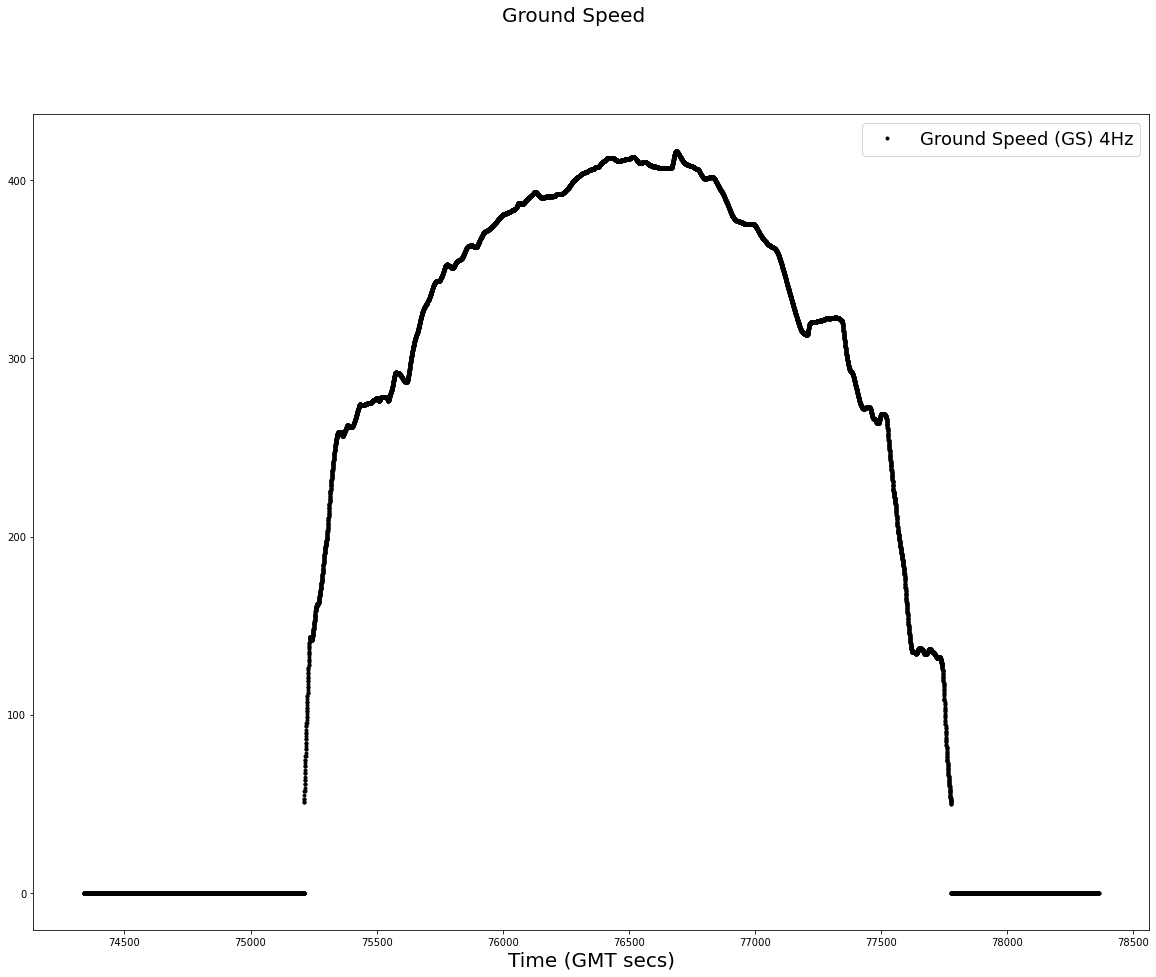

In [147]:
#elevator positions
nsqt = df['NSQT']
#elevr = df['ELEV_2']
ig2 = plt.figure(figsize=(20, 15))
fig2.suptitle('Airborne status compared to Ground Speed & alt',fontsize=20)
fig2 = plt.figure(figsize=(20, 15))
fig2.suptitle('Ground Speed',fontsize=20)

plt.plot(time, gs,  'k.', label='Ground Speed (GS) 4Hz')
#plt.plot(time, elevr,  'k+', label='Right Elevator (ELEV_2)')

plt.xlabel('Time (GMT secs)',fontsize=20)
plt.legend(fontsize=18);


##getting rid of inner labels
#for ax in fig.get_axes():
#    ax.label_outer()

In [90]:
max(gs[0:500])

0.0

(47100.0, 47110.0)

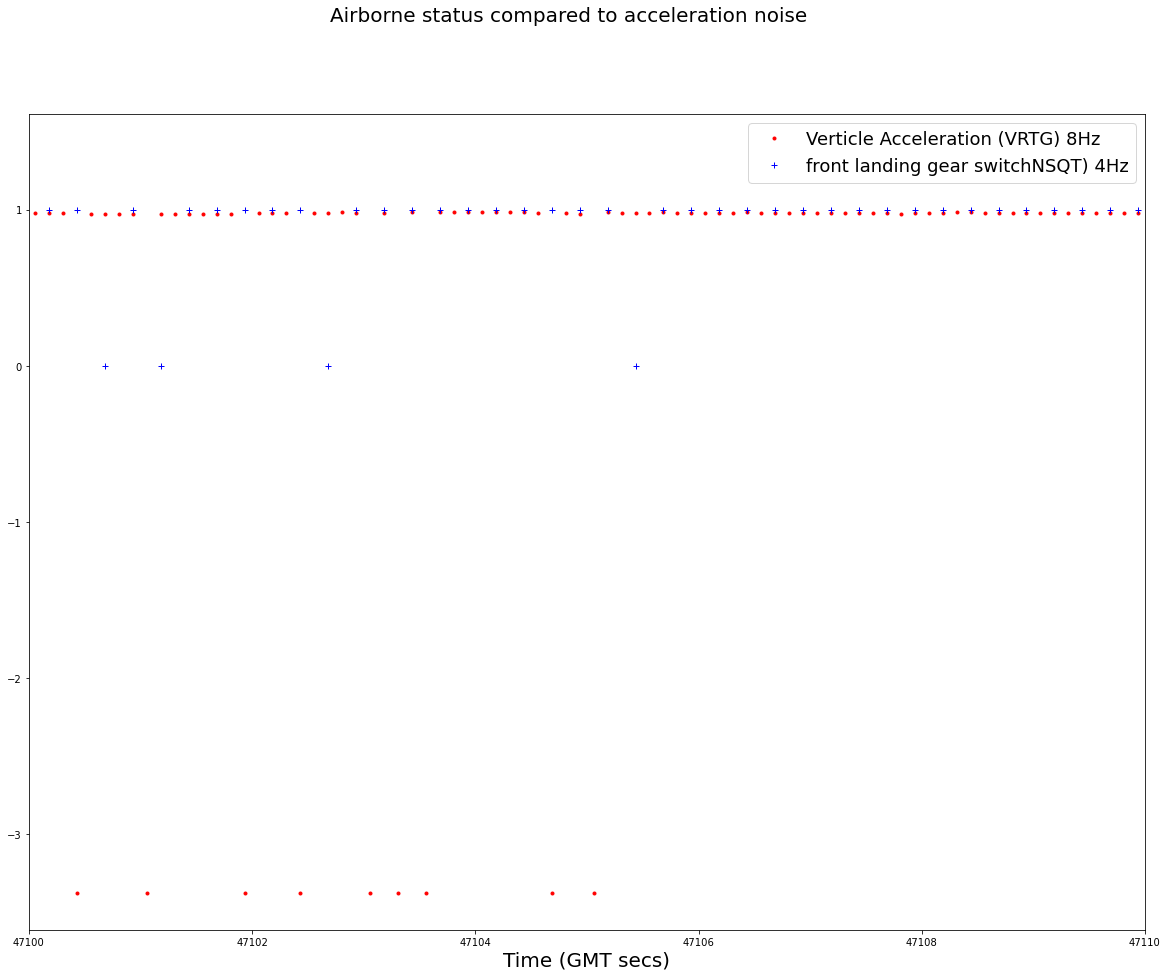

In [44]:
#elevator positions
nsqt = df['NSQT']
#elevr = df['ELEV_2']

fig2 = plt.figure(figsize=(20, 15))
fig2.suptitle('Airborne status compared to acceleration noise',fontsize=20)


plt.plot(time, vertg,'r.', label='Verticle Acceleration (VRTG) 8Hz')
plt.plot(time, nsqt,  'b+', label='front landing gear switchNSQT) 4Hz')
#plt.plot(time, elevr,  'k+', label='Right Elevator (ELEV_2)')

plt.xlabel('Time (GMT secs)',fontsize=20)
plt.legend(fontsize=18);
plt.xlim(47100,47110)

##getting rid of inner labels
#for ax in fig.get_axes():
#    ax.label_outer()

In [122]:
ns_qt = np.nan
ground_speed = 0

airborne = ns_qt or ground_speed

if not ns_qt or not ground_speed:
    print('ground')

airborne

ground


nan

In [152]:
df_drop = df.index[not df['GS'][:].bool()]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [200]:
%%time 

n_samples = gs.shape[0]
print(f'n_samples: {n_samples}')


drop_list = []
i=0
while i < n_samples-4:
    #print(i)
    gndspd = gs[i]
    if not gndspd:
        #print(f'i = {i}')
        drop_list.append(i)
        drop_list.append(i+1)
        drop_list.append(i+2)
        drop_list.append(i+3)
        i += 4
    else:
        i += 1
    
len(drop_list), drop_list

n_samples: 64295
CPU times: user 95.4 ms, sys: 0 ns, total: 95.4 ms
Wall time: 95 ms


(23284,
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  1

In [190]:
%timeit -n 10 df.iloc[df.index.drop(drop_list)]
%timeit -n 10 df.loc[df.index.drop(drop_list)]
%timeit -n 10 df[~df.index.isin(drop_list)]
%timeit -n 10 df.drop(drop_list)

21.5 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
22 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
22.6 ms ± 495 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
21.7 ms ± 338 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [201]:

%timeit -n 10 [i for i in range(n_samples) if not df['GS'][i]]

200 ms ± 865 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [209]:
%%time
df = df.iloc[df.index.drop(drop_list)]
df

KeyError: '[    0     1     2 ... 64289 64290 64291] not found in axis'

In [208]:
df.shape[0]

41011

In [72]:
i=0
while i < n_samples-8:
    print(i)
    if i == 5:
        print(f'i = {i}')
        i += 2
    i+=1

0
1
2
3
4
5
i = 5
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
